<div class="alert alert-success" style="color:blue; font-size:34px">
    <center><b>Artificial Neural Network (ANN) for Predicting Bearing Capacity of Spread Footings in Soil</b></center>
</div>

In this notebook, I'll build a predictor for bearing capacity of spread footings in soil. The specific predictor to be build will be an artificial neural network.

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
sns.set()

# **Data Wrangling**

## **Data Importing**

First, import the data.

In [3]:
df = pd.read_csv("BC_Data.csv")

In [4]:
df.head()

,"Footing Width, B (m)",Footing Length L (m),"Footing Depth, Df (m)","Friction Angle, ?0","Average Effective Unit Weight, g (kN/m3)","Cohesion, c (kN/m2)","Effective Stress, q (/s) (kN/m2)","Ultimate Bearing Capacity, qu (kN/m2)"
0,0.6,1.2,0.3,34.9,9.85,0,2.955,270.0
1,0.6,1.2,0.0,37.7,10.20,0,0.000,200.0
2,0.6,1.2,0.3,37.7,10.20,0,3.060,570.0
3,0.6,1.2,0.0,44.8,10.85,0,0.000,860.0
4,0.6,1.2,0.3,44.8,10.85,0,3.255,1760.0


## **Data Splitting**

First, we make a vertical split, split the data into a feature matrix and target vector.

In [5]:
X = df.drop(columns=["Ultimate Bearing Capacity, qu (kN/m2)"])
y = df["Ultimate Bearing Capacity, qu (kN/m2)"]

Then, we make a horizontal split to split the data into a training set and a test set.

In [6]:
# Assign 20% of the data to the test set and the remaining to the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Exploratory Data Analysis**

In this section, we carry out some exploratory data analysis.\
Let's start with checking for multicollinearity.

In [7]:
# correlation of predictors in training set
corr_train = X_train.corr()
corr_train

,"Footing Width, B (m)",Footing Length L (m),"Footing Depth, Df (m)","Friction Angle, ?0","Average Effective Unit Weight, g (kN/m3)","Cohesion, c (kN/m2)","Effective Stress, q (/s) (kN/m2)"
"Footing Width, B (m)",1.000000,0.749281,0.435832,-0.364275,-0.372498,0.202101,0.518080
Footing Length L (m),0.749281,1.000000,0.170128,-0.055245,-0.253577,-0.036230,0.228255
"Footing Depth, Df (m)",0.435832,0.170128,1.000000,-0.850907,-0.776285,0.695961,0.932847
"Friction Angle, ?0",-0.364275,-0.055245,-0.850907,1.000000,0.702548,-0.833741,-0.843271
"Average Effective Unit Weight, g (kN/m3)",-0.372498,-0.253577,-0.776285,0.702548,1.000000,-0.490470,-0.614970
"Cohesion, c (kN/m2)",0.202101,-0.036230,0.695961,-0.833741,-0.490470,1.000000,0.754604
"Effective Stress, q (/s) (kN/m2)",0.518080,0.228255,0.932847,-0.843271,-0.614970,0.754604,1.000000


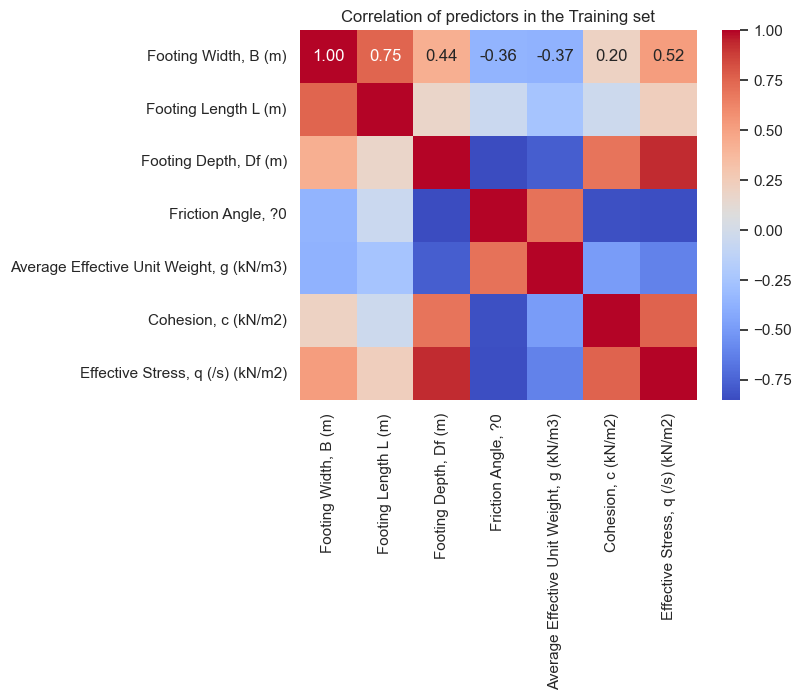

In [8]:
# Use a heatmap to visualize
sns.heatmap(corr_train, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation of predictors in the Training set")
plt.show()

We notice a very high correlation between Footing width and Footing length, regardless, we know these are independent dimensions of a foundation, the similarity may be due to having square or cirular foundations, which normally have the same width and length.\
We also notice a slightly high similarity between the cohesion and effective stress, again expected since cohesion contributes to effective stress.

Let's visualize the distributions of the predictors.

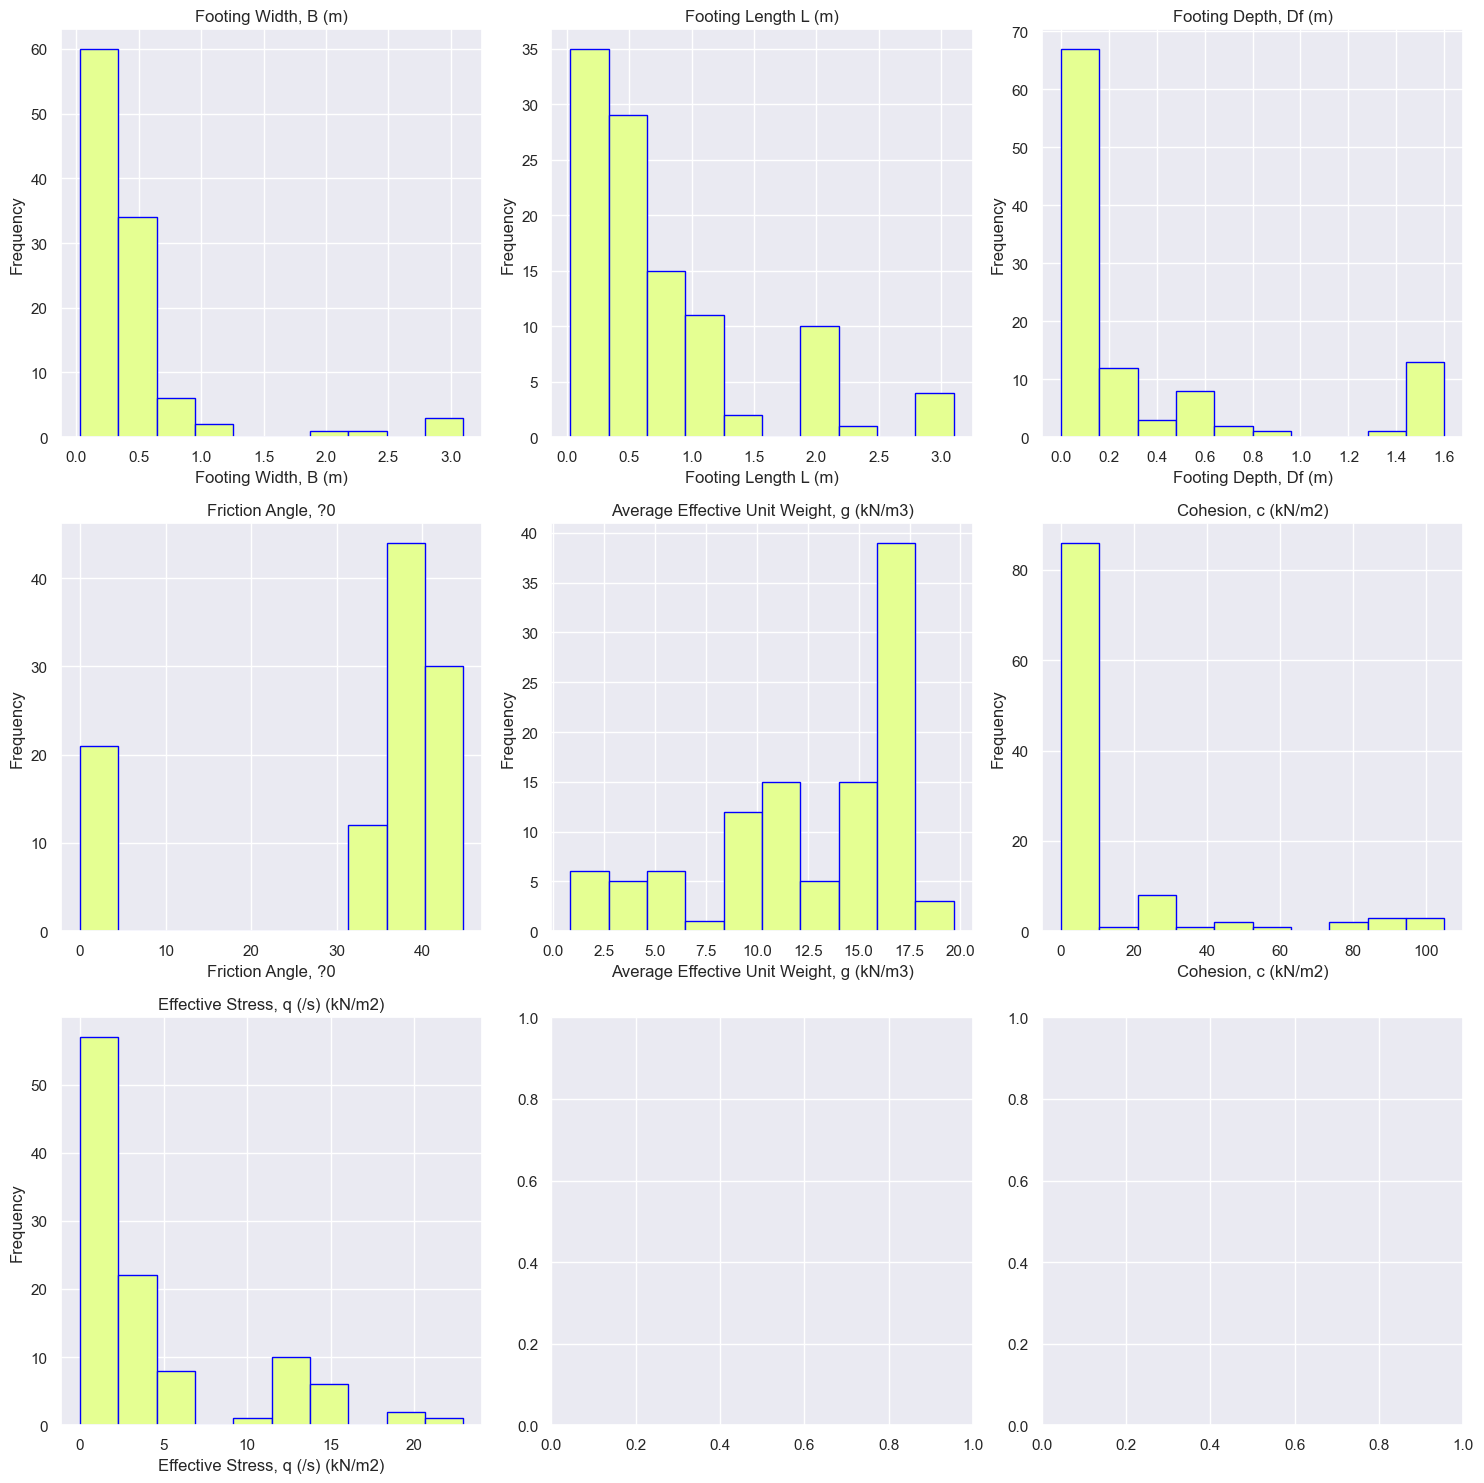

In [9]:
# plot the distributions of the predictors
col_names = X_train.columns

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axs = axs.flatten()  # makes it easier to reference the axes

for i in range(X_train.shape[1]):
    axs[i].hist(X_train.iloc[:, i], bins=10, color="#e5ff92", edgecolor="blue")
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlabel(col_names[i])
    axs[i].set_title(col_names[i])

plt.tight_layout()

plt.show()

# **Building the ML Model**

## **Baselining**

We will fit a baseline model in this section. We will use a multivariate linear regression model.\
We will use NumPy's least square method. It finds the weights by applying the normal equation:
$$
W = (X^TX)^{-1}X^TY
$$
where:\
$W =$ Weight vector (the learnt parameters)\
$X =$ The matrix of predictors, with the first column of ones for the intercept term\
$Y =$ The target matrix or vector

In [10]:
# let's define the augmented matrix X_aug that will be passed to our regression model
X_aug = np.hstack((np.ones((len(X_train), 1)), X_train.to_numpy()))   # add ones for the intercept term
X_aug[:5, :]   # print the first five rows

array([[1.00000000e+00, 5.00000000e-01, 5.00000000e-01, 3.00000000e-01,
        3.77000000e+01, 1.02000000e+01, 0.00000000e+00, 3.06000000e+00],
       [1.00000000e+00, 5.85000000e-02, 3.48075000e-01, 2.90000000e-02,
        3.95000000e+01, 1.65000000e+01, 0.00000000e+00, 4.78500000e-01],
       [1.00000000e+00, 1.52000000e-01, 1.52000000e-01, 7.50000000e-02,
        4.15000000e+01, 1.68000000e+01, 0.00000000e+00, 1.26000000e+00],
       [1.00000000e+00, 2.60000000e-01, 2.60000000e-01, 1.50000000e+00,
        0.00000000e+00, 3.41200000e+00, 8.90000000e+01, 1.39473333e+01],
       [1.00000000e+00, 2.60000000e-01, 2.60000000e-01, 1.50000000e+00,
        0.00000000e+00, 3.41200000e+00, 4.20000000e+01, 1.39473333e+01]])

In [11]:
# Get the parameters of the linear regression model
res = np.linalg.lstsq(X_aug, y_train, rcond=None)

# return the weights, the array on index 0 in the tuple returned by the function
params = res[0]
params

array([-814.8961416 ,   -1.39922429,   94.74712303,  -72.30353034,
         35.05449638,  -25.53723793,   10.2616465 ,   67.04729973])

Now that we have the parameters of the linear regression model, we can then use it to predict bearing capacity for values in the testing set.\
Recall that the linear regression model equation in this case is:
$$
y = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 + w_5 x_5 + w_6 x_6 + w_7 x_7
$$
$$
Y = WX
$$

In [12]:
# inference
X_aug_test = np.hstack((np.ones((len(X_test), 1)), X_test.to_numpy()))   # add ones for the intercept term
y_pred = X_aug_test @ params.reshape(8, -1)
y_pred

array([[1458.6462861 ],
       [ 392.51433389],
       [ 272.08650945],
       [ 239.26643836],
       [ 697.6552965 ],
       [ 218.94939557],
       [ 523.69973392],
       [ -24.64292427],
       [ 256.21736666],
       [ 258.08432464],
       [ 887.82968288],
       [ 675.44115339],
       [ 457.25852568],
       [  37.34918315],
       [ 375.37330971],
       [ 884.50881687],
       [ 269.15684528],
       [ 787.87117918],
       [ 363.23027504],
       [ 253.66364287],
       [ 318.69912722],
       [ 728.20411277],
       [ 230.00848997],
       [ 277.38205148],
       [ 435.13468863],
       [ 285.04245883],
       [ 794.76182784]])

Check the accuracy of the predictions of the linear regression model. We will use the root mean squared error and the mean absolute error.

In [13]:
# Evaluate the linear regression model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"The root mean squared error for the linear regression model on the test set is: {rmse}")
print(f"The mean absolute error for the linear regression model on the test set is: {mae}")

The root mean squared error for the linear regression model on the test set is: 517.2364790839285
The mean absolute error for the linear regression model on the test set is: 295.79830231142034


The ANN should beat this baseline if it to be accepted as performing better.

## **Train the model**

In this section, we'll fit the ANN on our data.\
This is a regression problem, we will fit a simple multilayer perceptron regressor on the data.

In [14]:
# Return the values only in the datasets
X_train_vals = X_train.to_numpy()
y_train_vals = y_train.to_numpy()

# Create a pipeline
model = Pipeline([
    ("scaler", StandardScaler()), # normalize features and return target values
    ("ann", MLPRegressor(
          hidden_layer_sizes = (10,),   # 1 layer with 10 nodes
          activation = 'relu',
          solver = 'lbfgs',
          batch_size = 'auto',
          learning_rate = 'adaptive',
          learning_rate_init = 0.03,
          max_iter=5000,
          momentum = 0.2,
          random_state = 42,
          early_stopping=True
        )
    )   # Initialize the Model
])

# Initialize K-Fold, we'll use 10 splits
kf = KFold(n_splits=10, shuffle=False)

# list to store errors
errors = []

# Train the model using k-fold cross validation
for fold, (train_index, val_index) in enumerate(kf.split(X_train_vals, y_train_vals)):
    X_train_part, X_val = X_train_vals[train_index], X_train_vals[val_index]
    y_train_part, y_val = y_train_vals[train_index], y_train_vals[val_index]
    
    # Train the model
    model.fit(X_train_vals, y_train_vals)
    
    # Predict and evaluate
    y_pred = model.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    errors.append(rmse)
    print(f"Fold {fold+1}/10 root mean squared error: {rmse:.5f}")

# Calculate the mean rmse
mean_rmse = np.mean(errors)

Fold 1/10 root mean squared error: 34.51018
Fold 2/10 root mean squared error: 54.91538
Fold 3/10 root mean squared error: 31.86148
Fold 4/10 root mean squared error: 13.75452
Fold 5/10 root mean squared error: 46.76308
Fold 6/10 root mean squared error: 22.43058
Fold 7/10 root mean squared error: 13.26058
Fold 8/10 root mean squared error: 51.94182
Fold 9/10 root mean squared error: 50.00189
Fold 10/10 root mean squared error: 31.96983


In [15]:
# print the mean root mean squared error
mean_rmse

35.1409325470255

## **Evaluation**

Let's evaluate the performance of the trained ANN model on the test set.

In [16]:
# Inference
y_pred = model.predict(X_test.to_numpy())
rmse = root_mean_squared_error(y_test, y_pred)

print(f"The root mean squared error for the Artificial Neural Network model on the test set is: {rmse}")

The root mean squared error for the Artificial Neural Network model on the test set is: 223.19150075099319


It seems the ANN model performs better than the linear regression model.\
Next, we will try to tune the hypaparameter **"number of hidden layer nodes"**.

# **Hyperparameter Tuning**

Hyperparameter tuning involves searching for a combination of hyperparameters with which the model performs best. In this section we'll only tune one hyperparameter: number of hidden layer nodes.

In [17]:
# Define a function for training the model
def run_cv(X, y, num_nodes, n_splits=10):
    # Create a pipeline
    model = Pipeline([
        ("scaler", StandardScaler()), # normalize features and return target values
        ("ann", MLPRegressor(
              hidden_layer_sizes = (num_nodes,),   # 1 layer with 10 nodes
              activation = 'relu',
              solver = 'lbfgs',
              batch_size = 'auto',
              learning_rate = 'adaptive',
              learning_rate_init = 0.03,
              max_iter=5000,
              momentum = 0.2,
              random_state = 42,
              early_stopping=True
            )
        )   # Initialize the Model
    ])

    # Initialize K-Fold, we'll use 10 splits
    kf = KFold(n_splits=10, shuffle=False)
    
    # list to store errors
    errors = []
    
    # Train the model using k-fold cross validation
    for fold, (train_index, val_index) in enumerate(kf.split(X, y)):
        X_train_part, X_val = X[train_index], X[val_index]
        y_train_part, y_val = y[train_index], y[val_index]
        
        # Train the model
        model.fit(X_train_vals, y_train_vals)

        # Predict and evaluate
        y_pred = model.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        errors.append(rmse)
        print(f"Fold {fold+1}/10 root mean squared error: {rmse:.5f}")

    # Calculate the mean rmse
    mean_rmse = np.mean(errors)
    
    # return the mean error
    return mean_rmse, model

In [18]:
# fit models with different number of hidden layer nodes

error_dict = {}
models = {}

for i in np.arange(3, 20):
    print("-----------------------------------------------------------------------------")
    print(f"ANN model with {i} nodes")
    print("-----------------------------------------------------------------------------")

    err, models[f"{i} HL nodes model"] = run_cv(X_train_vals, y_train_vals, i)
    error_dict[f"{i} HL nodes model"] = err

    print("-----------------------------------------------------------------------------")
    print()

-----------------------------------------------------------------------------
ANN model with 3 nodes
-----------------------------------------------------------------------------
Fold 1/10 root mean squared error: 94.75300
Fold 2/10 root mean squared error: 190.15985
Fold 3/10 root mean squared error: 121.37690
Fold 4/10 root mean squared error: 46.85653
Fold 5/10 root mean squared error: 96.14974
Fold 6/10 root mean squared error: 64.02024
Fold 7/10 root mean squared error: 57.79667
Fold 8/10 root mean squared error: 139.08977
Fold 9/10 root mean squared error: 97.53919
Fold 10/10 root mean squared error: 70.26425
-----------------------------------------------------------------------------

-----------------------------------------------------------------------------
ANN model with 4 nodes
-----------------------------------------------------------------------------
Fold 1/10 root mean squared error: 53.97461
Fold 2/10 root mean squared error: 79.84234
Fold 3/10 root mean squared err

C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 1/10 root mean squared error: 10.58014


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 2/10 root mean squared error: 49.16933


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 3/10 root mean squared error: 12.23862


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 4/10 root mean squared error: 5.93394


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 5/10 root mean squared error: 5.06773


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 6/10 root mean squared error: 4.36130


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 7/10 root mean squared error: 4.15160


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 8/10 root mean squared error: 53.05864


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 9/10 root mean squared error: 13.08469


C:\Users\x6cem\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Fold 10/10 root mean squared error: 8.45583
-----------------------------------------------------------------------------

-----------------------------------------------------------------------------
ANN model with 16 nodes
-----------------------------------------------------------------------------
Fold 1/10 root mean squared error: 12.05221
Fold 2/10 root mean squared error: 49.29460
Fold 3/10 root mean squared error: 12.83584
Fold 4/10 root mean squared error: 11.73463
Fold 5/10 root mean squared error: 12.02850
Fold 6/10 root mean squared error: 7.39853
Fold 7/10 root mean squared error: 8.65847
Fold 8/10 root mean squared error: 53.46930
Fold 9/10 root mean squared error: 23.55243
Fold 10/10 root mean squared error: 15.24854
-----------------------------------------------------------------------------

-----------------------------------------------------------------------------
ANN model with 17 nodes
-----------------------------------------------------------------------------

Let's compare the training errors.

In [19]:
# Compare training errors
pd.DataFrame(error_dict, index=["Root Mean Squared Error"]).T

,Root Mean Squared Error
3 HL nodes model,97.800614
4 HL nodes model,60.015690
5 HL nodes model,30.835889
6 HL nodes model,35.360400
7 HL nodes model,45.132316
8 HL nodes model,28.994650
9 HL nodes model,26.499113
10 HL nodes model,35.140933
11 HL nodes model,20.522922
12 HL nodes model,27.792594


## **Evaluation**

Let's evaluate each model.

In [20]:
# Inference
Y_pred = {}

for key, val in models.items():
    Y_pred[key] = val.predict(X_test.values)

In [21]:
# Return the prediction errors for each model
test_errors = {}

for key, val in Y_pred.items():
    test_errors[key] = root_mean_squared_error(y_test, val)

In [22]:
# Observe
err_df = pd.DataFrame(test_errors, index=["Root Mean Square Error"]).T
err_df

,Root Mean Square Error
3 HL nodes model,421.755444
4 HL nodes model,411.622980
5 HL nodes model,412.191454
6 HL nodes model,454.831324
7 HL nodes model,270.010302
8 HL nodes model,438.778012
9 HL nodes model,431.764953
10 HL nodes model,223.191501
11 HL nodes model,348.066583
12 HL nodes model,306.113688


In [23]:
# Return the model with the minimum error
min_err = err_df.min()
err_df.loc[err_df["Root Mean Square Error"] == min_err.values[0]]

,Root Mean Square Error
10 HL nodes model,223.191501


So it seems the 10 nodes we chose before remain the best ANN predictor.\
However, we can always try to tune multiple parameters together to find the optimal ANN model.

Let's save this model.

In [24]:
# Use joblib to save the model
import joblib

filename = "ann_bc_predictor.joblib"

joblib.dump(models["10 HL nodes model"], filename)

print(f"Saved model as {filename}")

Saved model as ann_bc_predictor.joblib


# **Communicating results**

The best way to communicate our results is through visualizations. In this section we'll make some visualizations of the results.

## **ANN Architecture**

Let's visualize the architecure of the model.

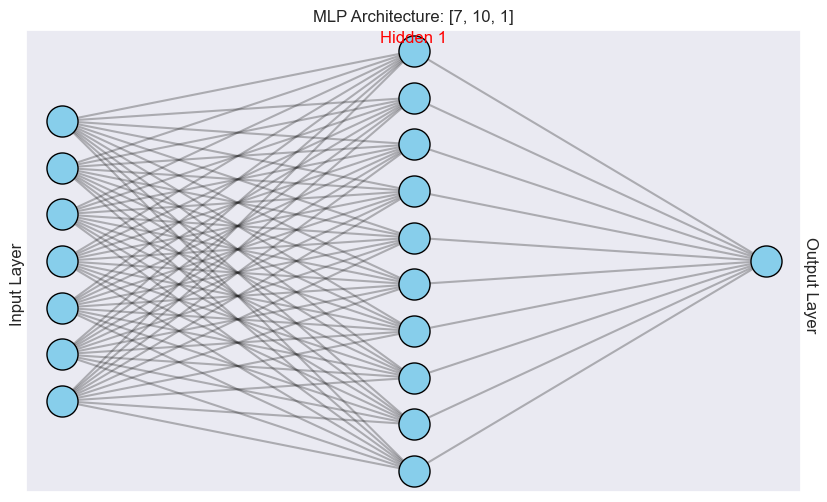

In [25]:
# A function to visualize the model
def draw_neural_net(model, ax, left=0.1, right=0.9, bottom=0.1, top=1.9):
    # Get layer sizes from the trained model
    layer_sizes = [model.coefs_[0].shape[0]] + list(model.hidden_layer_sizes) + [model.coefs_[-1].shape[1]]
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom) / float(max(layer_sizes))
    h_spacing = (right - left) / float((n_layers - 1))
    
    # Coordinates for nodes
    layer_nodes = {}
    
    for i, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing * layer_size / 2. + (top + bottom) / 2.
        nodes = [(left + i * h_spacing, layer_top - j * v_spacing) for j in range(layer_size)]
        layer_nodes[i] = nodes
        
        # Draw Nodes
        ax.scatter([x for x, y in nodes], [y for x, y in nodes], s=500, c='skyblue', edgecolor='black', zorder=2)
    
        # Label Layers
        if i == 0:
            ax.text(left - 0.05, (top + bottom) / 2, "Input Layer", rotation=90, ha='center', va='center')
        elif i == n_layers - 1:
            ax.text(right + 0.05, (top + bottom) / 2, "Output Layer", rotation=-90, ha='center', va='center')
        else:
            ax.text(left + i * h_spacing, top + 0.05, f"Hidden {i}", ha='center', va='center', zorder=3, c="red")
    
    
    # Draw Connections (Weights)
    for i in range(n_layers - 1):
        for x1, y1 in layer_nodes[i]:
            for x2, y2 in layer_nodes[i+1]:
                ax.plot([x1, x2], [y1, y2], 'k-', alpha=0.3, zorder=1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"MLP Architecture: {layer_sizes}")

# Save the ann model in a variable 'mlp'
mlp = models["10 HL nodes model"].named_steps.ann

fig, ax = plt.subplots(figsize=(10, 6))
draw_neural_net(mlp, ax)

plt.savefig("ann_bc_architecture")

plt.show()

## **Predictions vs Actual Values**

Plot the predictions of the model against the true values.

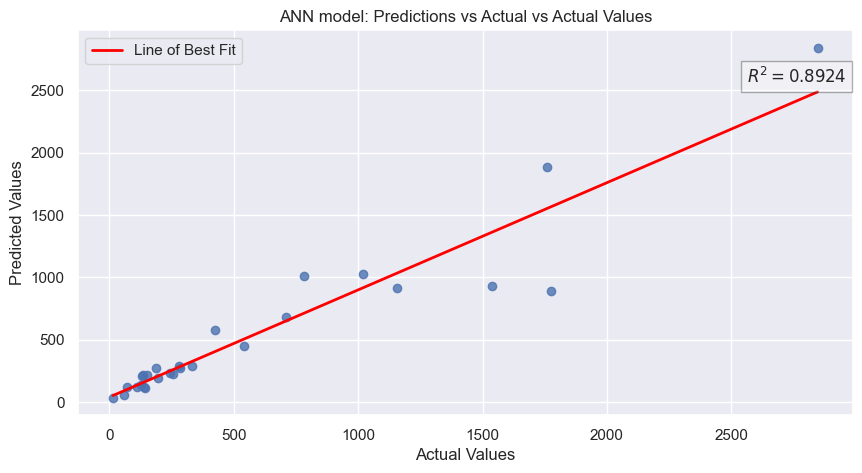

In [91]:
# Plot predictions vs actual values
y_pred = Y_pred["10 HL nodes model"]

plt.figure(figsize=(10, 5))
# scatter plot of the values
plt.scatter(y_test, y_pred, alpha=0.8)

# line of best fit
slope, intercept = np.polyfit(y_test, y_pred, 1)
best_fit_line = np.poly1d([slope, intercept])
vals_to_fit = np.array([y_test.min(), y_test.max()])

plt.plot(vals_to_fit, best_fit_line(vals_to_fit), color='red', linestyle='-', linewidth=2, label='Line of Best Fit')

# Calculate and display R^2
r2 = r2_score(y_test, y_pred)
plt.text(y_test.max() * 0.9, y_pred.max() * 0.9, f'$R^2 = {r2:.4f}$', fontsize=12, bbox=dict(facecolor='#fff', alpha=0.3, edgecolor='#000'))

# plot attributes
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("ANN model: Predictions vs Actual vs Actual Values")
plt.legend()

plt.savefig("predictions_vs_actual")

plt.show()

## **Comparative Analysis**

In this subsection, we'll compare the predictions of the ANN with that of the bearing capacity theories.
Fisrt, we'll export the test set to obtain predictions on it using the bearing capacity theories

In [27]:
# Export the test set
test_df = X_test
test_df.to_csv("test_set.csv", index=False)

Then, we import the bearing capacity theories' predictions on the test set.

In [28]:
bc_theories_df = pd.read_csv("BC_theories.csv")
bc_theories_df.head()

,Terzaghi,Meyerhof,Vesic,Hansen
0,850.405091,1513.811385,1093.037102,1093.037102
1,144.037647,362.195568,330.817702,296.829365
2,74.259476,534.770367,230.612580,169.396611
3,379.024349,228.840072,127.685585,94.676359
4,517.119858,647.871552,648.806835,604.519039


In [29]:
# combine this dataframe with the ANN model predictions, to have all the predictions in one place
pred_df = pd.concat((bc_theories_df, pd.DataFrame(y_pred, columns=["ANN"])), axis=1)
pred_df.head()

,Terzaghi,Meyerhof,Vesic,Hansen,ANN
0,850.405091,1513.811385,1093.037102,1093.037102,1029.317132
1,144.037647,362.195568,330.817702,296.829365,292.013149
2,74.259476,534.770367,230.612580,169.396611,287.657298
3,379.024349,228.840072,127.685585,94.676359,123.300601
4,517.119858,647.871552,648.806835,604.519039,888.085439


In [74]:
# Determine the R^2 for each method
col_names = pred_df.columns

r2_dict = {}

for i in col_names:
    r2_dict[i] = np.corrcoef(pred_df[i], y_test)[0][1]

r2_df = pd.DataFrame(r2_dict, index=["$R^2$"]).T.sort_values(by="$R^2$", ascending=False)
r2_df

,$R^2$
ANN,0.947234
Vesic,0.928332
Hansen,0.922158
Meyerhof,0.889738
Terzaghi,0.572722


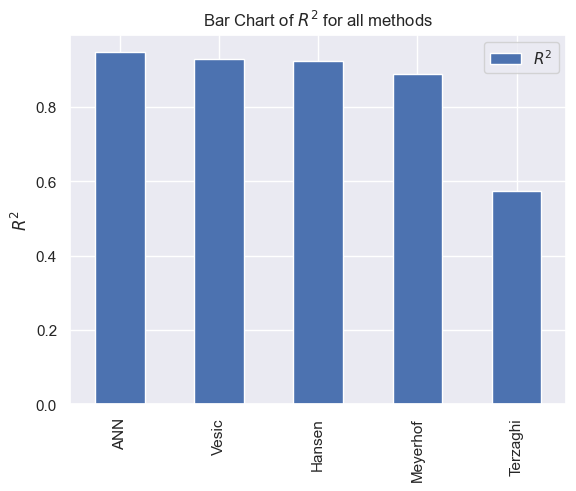

In [92]:
r2_df.plot(kind="bar")
plt.ylabel("$R^2$")
plt.title("Bar Chart of $R^2$ for all methods")

plt.savefig("r2_bar_plot")

plt.show()

It seems the ANN model performs better.

Let's compare the errors as well.

In [81]:
pred_err_dict = {}

for i in col_names:
    pred_err_dict[i] = {
        "mae": mean_absolute_error(pred_df[i], y_test), 
        "rmse": root_mean_squared_error(pred_df[i], y_test)
    }

pred_err_df = pd.DataFrame(pred_err_dict)
pred_err_df

,Terzaghi,Meyerhof,Vesic,Hansen,ANN
mae,374.001528,177.562468,185.837915,223.095223,109.274578
rmse,588.835821,320.923701,357.949958,404.043558,223.191501


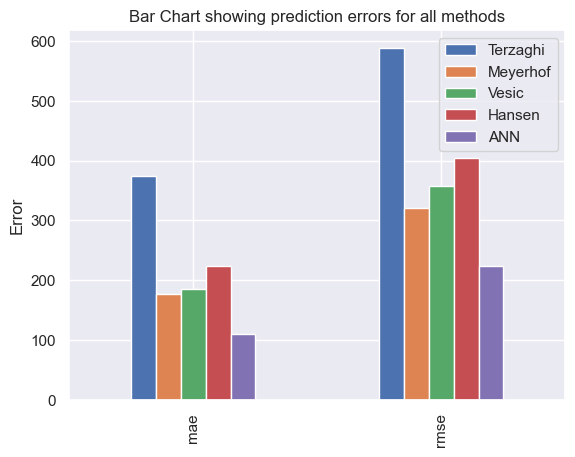

In [93]:
# A plot to compare the errors
pred_err_df.plot(kind="bar")
plt.ylabel("Error")
plt.title("Bar Chart showing prediction errors for all methods")

plt.savefig("error_bar_plot")

plt.show()

---